# Notebook to abstract away data preprocessing code from modeling code for TFRS-based implementations

In [50]:
#Imports and setups
import pandas as pd
import matplotlib
import seaborn as sns
import sys
sys.path.insert(0,'/mnt/c/Users/omegatro/Desktop/IGP_2023/modules/')
from preprocessing import read_random_rows

In [11]:
#Seeds and sampling parameters
transaction_seed = 0
transaction_fraction = 0.05

In [59]:
#Helper functions
def print_null_counts(df):
  for c in df.columns:
      print(f'{c}: Null_counts:{df[c].isnull().sum()}')

def overview_df(df):
   print(f'Column names: {" ".join(["_".join(c) for c in df.columns if isinstance(c,tuple)])}')
   display(df.head())
   display(df.describe())
   print_null_counts(df)
    
def view_unq_classes(df, column_list):
    for c in columns_list:
        print(c)
        display(cus_df[c].unique())

In [119]:
#Loading raw data
art_df       = pd.read_csv('../../data/articles.csv')
cus_df       = pd.read_csv('../../data/customers.csv')
transactions = read_random_rows('../../data/transactions_train.csv', seed=transaction_seed, fraction=transaction_fraction)

# Get fast glimpse at the data

## Article data

In [120]:
#all features are categorical
overview_df(art_df.astype('object'))

Column names: 


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
count,105542,105542,105542,105542,105542,105542,105542,105542,105542,105542,...,105542,105542,105542,105542,105542,105542,105542,105542,105542,105126
unique,105542,47224,45875,132,131,19,30,30,50,50,...,250,10,10,5,5,57,56,21,21,43404
top,108775015,783707,Dragonfly dress,272,Trousers,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1005,Jersey Fancy,T-shirt in printed cotton jersey.
freq,1,75,98,11169,11169,42741,49747,49747,22670,22670,...,4604,26001,26001,39737,39737,7295,7295,21445,21445,159


article_id: Null_counts:0
product_code: Null_counts:0
prod_name: Null_counts:0
product_type_no: Null_counts:0
product_type_name: Null_counts:0
product_group_name: Null_counts:0
graphical_appearance_no: Null_counts:0
graphical_appearance_name: Null_counts:0
colour_group_code: Null_counts:0
colour_group_name: Null_counts:0
perceived_colour_value_id: Null_counts:0
perceived_colour_value_name: Null_counts:0
perceived_colour_master_id: Null_counts:0
perceived_colour_master_name: Null_counts:0
department_no: Null_counts:0
department_name: Null_counts:0
index_code: Null_counts:0
index_name: Null_counts:0
index_group_no: Null_counts:0
index_group_name: Null_counts:0
section_no: Null_counts:0
section_name: Null_counts:0
garment_group_no: Null_counts:0
garment_group_name: Null_counts:0
detail_desc: Null_counts:416


# Customer data
- A [comment](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/307001) on FN & Active feature

In [61]:
overview_df(cus_df)

Column names: 


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


,FN,Active,age
count,1.371980e+06,1.371980e+06,1.371980e+06
mean,3.476217e-01,3.384918e-01,3.638249e+01
std,4.762153e-01,4.731969e-01,1.423071e+01
min,0.000000e+00,0.000000e+00,1.600000e+01
25%,0.000000e+00,0.000000e+00,2.400000e+01
50%,0.000000e+00,0.000000e+00,3.200000e+01
75%,1.000000e+00,1.000000e+00,4.900000e+01
max,1.000000e+00,1.000000e+00,9.900000e+01


customer_id: Null_counts:0
FN: Null_counts:0
Active: Null_counts:0
club_member_status: Null_counts:0
fashion_news_frequency: Null_counts:0
age: Null_counts:0
postal_code: Null_counts:0


In [23]:
#picking numeric & categorical
cus_num = ['age']
cus_cat = [c for c in cus_df.columns if c not in cus_num]

In [24]:
#describing numeric separately
overview_df(cus_df[cus_num])

Column names: age


,age
0,49.0
1,25.0
2,24.0
3,54.0
4,52.0


,age
count,1.356119e+06
mean,3.638696e+01
std,1.431363e+01
min,1.600000e+01
25%,2.400000e+01
50%,3.200000e+01
75%,4.900000e+01
max,9.900000e+01


age: Null_counts:15861


In [25]:
#describing categorical separately
overview_df(cus_df[cus_cat].astype('object'))

Column names: customer_id FN Active club_member_status fashion_news_frequency postal_code


,customer_id,FN,Active,club_member_status,fashion_news_frequency,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


,customer_id,FN,Active,club_member_status,fashion_news_frequency,postal_code
count,1371980,476930.0,464404.0,1365918,1355969,1371980
unique,1371980,1.0,1.0,3,3,352899
top,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1.0,1.0,ACTIVE,NONE,2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq,1,476930.0,464404.0,1272491,877711,120303


customer_id: Null_counts:0
FN: Null_counts:895050
Active: Null_counts:907576
club_member_status: Null_counts:6062
fashion_news_frequency: Null_counts:16011
postal_code: Null_counts:0


In [90]:
#getting unique categories for a null-containing_columns
col_list = [
    'FN',
    'Active',
    'club_member_status',
    'fashion_news_frequency'
]
view_unq_classes(cus_df, column_list=col_list)

FN


array([0., 1.])

Active


array([0., 1.])

club_member_status


array(['ACTIVE', 'NONE', 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

fashion_news_frequency


array(['NONE', 'Regularly', 'Monthly'], dtype=object)

# Transaction data

In [21]:
overview_df(transactions)

Column names: t_dat customer_id article_id price sales_channel_id


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,664421002,0.016932,2
1,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,377277001,0.008458,2
2,2018-09-20,008a118b7c72fd3b8a614eb2672ddfc2a78434c5776af2...,578476001,0.048288,1
3,2018-09-20,00923f88cda50cbea4c5ceb2bd3467c620a9d74cb7da95...,655347007,0.015237,1
4,2018-09-20,00a4f2c8cc87ffb0ea7db47b4b0b247b9ef11033c8d976...,610097001,0.028797,2


,article_id,price,sales_channel_id
count,1.589098e+06,1.589098e+06,1.589098e+06
mean,6.961580e+08,2.784851e-02,1.704264e+00
std,1.335193e+08,1.922846e-02,4.563732e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.327840e+08,1.584746e-02,1.000000e+00
50%,7.146200e+08,2.540678e-02,2.000000e+00
75%,7.863070e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.067797e-01,2.000000e+00


t_dat: Null_counts:0
customer_id: Null_counts:0
article_id: Null_counts:0
price: Null_counts:0
sales_channel_id: Null_counts:0


In [28]:
#picking numeric & categorical
tr_num = ['price']
tr_cat = [c for c in transactions.columns if c not in tr_num]

In [29]:
#describing numeric separately
overview_df(transactions[tr_num])

Column names: price


,price
0,0.016932
1,0.008458
2,0.048288
3,0.015237
4,0.028797


,price
count,1.589098e+06
mean,2.784851e-02
std,1.922846e-02
min,1.694915e-05
25%,1.584746e-02
50%,2.540678e-02
75%,3.388136e-02
max,5.067797e-01


price: Null_counts:0


In [31]:
#describing categorical separately
overview_df(transactions[tr_cat].astype('object'))

Column names: t_dat customer_id article_id sales_channel_id


,t_dat,customer_id,article_id,sales_channel_id
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,664421002,2
1,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,377277001,2
2,2018-09-20,008a118b7c72fd3b8a614eb2672ddfc2a78434c5776af2...,578476001,1
3,2018-09-20,00923f88cda50cbea4c5ceb2bd3467c620a9d74cb7da95...,655347007,1
4,2018-09-20,00a4f2c8cc87ffb0ea7db47b4b0b247b9ef11033c8d976...,610097001,2


,t_dat,customer_id,article_id,sales_channel_id
count,1589098,1589098,1589098,1589098
unique,734,617096,78524,2
top,2019-09-28,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,706016001,2
freq,9970,80,2624,1119144


t_dat: Null_counts:0
customer_id: Null_counts:0
article_id: Null_counts:0
sales_channel_id: Null_counts:0


# Data cleaning

## Customer data

In [39]:
#Harmonizing class names and filling in missing values
cus_df.club_member_status     = cus_df.club_member_status.fillna('NONE')
cus_df.fashion_news_frequency = cus_df.fashion_news_frequency.fillna('NONE')
cus_df.club_member_status     = cus_df.club_member_status.replace('None', 'NONE')
cus_df.fashion_news_frequency = cus_df.fashion_news_frequency.replace('None','NONE')

#Replacing missing age values with average age
cus_df['age'].fillna(int(cus_df['age'].mean()), inplace=True)

#Replacing missing values
cus_df.FN.fillna(0.0, inplace=True)
cus_df.Active.fillna(0.0, inplace=True)

In [41]:
#saving cleaned data
cus_df.to_csv('../../data/processed/customers_filled.csv', index=False)

## Article data

In [121]:
#Filling in missing plaintext descriptions
art_df.detail_desc = art_df.detail_desc.fillna('')

In [43]:
#Saving cleaned data
art_df.to_csv('../../data/processed/articles_filled.csv', index=False)

# Exploration & Feature engineering 

## Transaction data

In [70]:
# Transaction data contain price variable
# It is valuable to know how this varies for each article
art_grp_data = transactions.groupby('article_id').agg(
        {
        'price':['mean', 'std', 'sem', 'min', 'max'], 
        't_dat':'count'
        }
    )
display(
    art_grp_data
)

price                                         t_dat
                mean       std       sem       min       max count
article_id                                                        
108775015   0.008133  0.000657  0.000028  0.004898  0.008559   571
108775044   0.008134  0.000758  0.000040  0.001678  0.008458   361
108775051   0.004898  0.000415  0.000169  0.004051  0.005068     6
110065001   0.021071  0.006574  0.000856  0.004220  0.025407    59
110065002   0.018656  0.005657  0.001069  0.006085  0.025407    28
...              ...       ...       ...       ...       ...   ...
949551001   0.033477  0.000666  0.000252  0.032068  0.033881     7
949551002   0.031056  0.002589  0.001495  0.028797  0.033881     3
952267001   0.016932  0.000000  0.000000  0.016932  0.016932     2
953450001   0.016932  0.000000  0.000000  0.016932  0.016932     2
956217002   0.059305       NaN       NaN  0.059305  0.059305     1

[78524 rows x 6 columns]

In [71]:
#filling in missing std values
art_grp_data[[('price', 'std'), ('price','sem')]].fillna(0.0, inplace=True)

/tmp/ipykernel_2467/4102295879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_grp_data[[('price', 'std'), ('price','sem')]].fillna(0.0, inplace=True)


In [72]:
#overview data
overview_df(art_grp_data)

Column names: price_mean price_std price_sem price_min price_max t_dat_count


price                                         t_dat
                mean       std       sem       min       max count
article_id                                                        
108775015   0.008133  0.000657  0.000028  0.004898  0.008559   571
108775044   0.008134  0.000758  0.000040  0.001678  0.008458   361
108775051   0.004898  0.000415  0.000169  0.004051  0.005068     6
110065001   0.021071  0.006574  0.000856  0.004220  0.025407    59
110065002   0.018656  0.005657  0.001069  0.006085  0.025407    28

price                                                          \
               mean           std           sem           min           max   
count  78524.000000  64895.000000  64895.000000  78524.000000  78524.000000   
mean       0.029868      0.005323      0.001781      0.022328      0.034211   
std        0.025622      0.006282      0.003016      0.022912      0.028610   
min        0.000610      0.000000      0.000000      0.000017      0.000610   
25%        0.015237      0.001486      0.000366      0.010153      0.016932   
50%        0.023988      0.003595      0.000937      0.016932      0.025407   
75%        0.036104      0.007156      0.002088      0.027102      0.042356   
max        0.506780      0.260862      0.184458      0.506780      0.506780   

              t_dat  
              count  
count  78524.000000  
mean      20.237099  
std       44.755797  
min        1.000000  
25%        2.000000  
50%        7.000000  
75%       21.000000  
max     2624.000000

('price', 'mean'): Null_counts:0
('price', 'std'): Null_counts:13629
('price', 'sem'): Null_counts:13629
('price', 'min'): Null_counts:0
('price', 'max'): Null_counts:0
('t_dat', 'count'): Null_counts:0


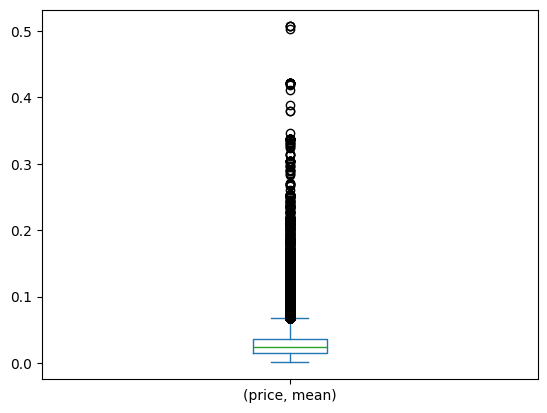

In [85]:
#Distribution of average product prices
art_grp_data[('price', 'mean')].plot.box()
matplotlib.pyplot.show()

In [115]:
#Adding mean price variable to the articles data
art_price = art_grp_data[('price', 'mean')].reset_index()
art_price.columns = art_price.columns.droplevel(1)
art_price.rename(columns={'price':'avg_price'}, inplace=True)

In [116]:
overview_df(art_price)

Column names: 


,article_id,avg_price
0,108775015,0.008133
1,108775044,0.008134
2,108775051,0.004898
3,110065001,0.021071
4,110065002,0.018656


,article_id,avg_price
count,7.852400e+04,78524.000000
mean,7.044037e+08,0.029868
std,1.234776e+08,0.025622
min,1.087750e+08,0.000610
25%,6.298260e+08,0.015237
50%,7.087290e+08,0.023988
75%,7.959783e+08,0.036104
max,9.562170e+08,0.506780


article_id: Null_counts:0
avg_price: Null_counts:0


In [122]:
#adding average price for product that were bought at least 1 time
art_df = art_df.merge(art_price, on='article_id', how='left')

#filling empty average price values with 0 - these products were never purchased
art_df.avg_price.fillna(0.0, inplace=True)

In [123]:
overview_df(art_df)

Column names: 


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,avg_price
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,0.008133
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,0.008134
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,0.004898
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",0.021071
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",0.018656


,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no,avg_price
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290,0.022222
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023,0.025658
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000,0.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000,0.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000,0.016932
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000,0.031532
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000,0.506780


article_id: Null_counts:0
product_code: Null_counts:0
prod_name: Null_counts:0
product_type_no: Null_counts:0
product_type_name: Null_counts:0
product_group_name: Null_counts:0
graphical_appearance_no: Null_counts:0
graphical_appearance_name: Null_counts:0
colour_group_code: Null_counts:0
colour_group_name: Null_counts:0
perceived_colour_value_id: Null_counts:0
perceived_colour_value_name: Null_counts:0
perceived_colour_master_id: Null_counts:0
perceived_colour_master_name: Null_counts:0
department_no: Null_counts:0
department_name: Null_counts:0
index_code: Null_counts:0
index_name: Null_counts:0
index_group_no: Null_counts:0
index_group_name: Null_counts:0
section_no: Null_counts:0
section_name: Null_counts:0
garment_group_no: Null_counts:0
garment_group_name: Null_counts:0
detail_desc: Null_counts:0
avg_price: Null_counts:0


In [124]:
#Saving priced data
art_df.to_csv('../../data/processed/articles_filled_priced.csv', index=False)

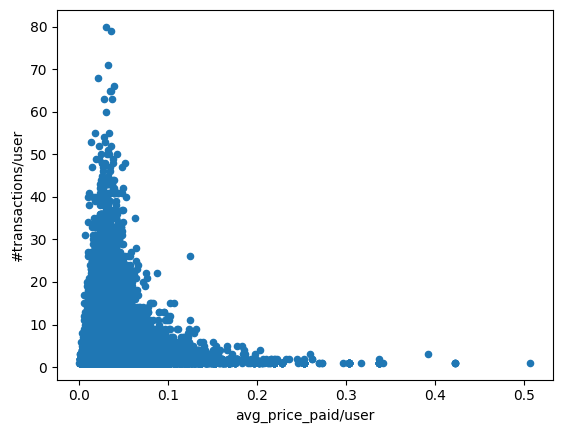

In [184]:
#Another interesting thing to look at is the distribution of number of transactions by users,
#also including the information about the average price paid
cus_count_price = transactions.groupby('customer_id').agg({'t_dat':'count', 'price':'mean'}).reset_index()[['t_dat', 'price']].rename(columns={'price':'avg_price_paid/user','t_dat':'#transactions/user'})
cus_count_price.plot.scatter(x='avg_price_paid/user',y='#transactions/user')
matplotlib.pyplot.show()

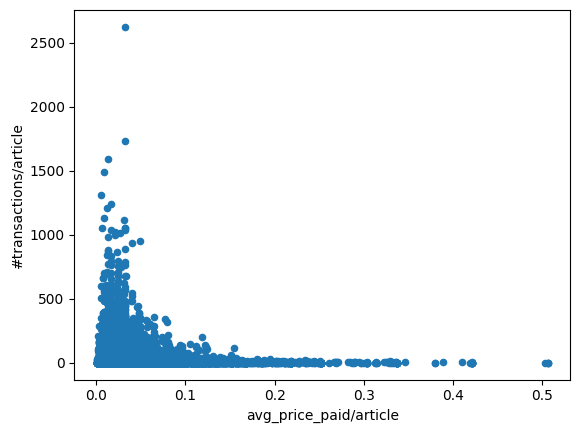

In [147]:
#The distribution of number of transactions by article,
#also including the information about the average price paid is also interesting
cus_count_price = transactions.groupby('article_id').agg({'t_dat':'count', 'price':'mean'}).reset_index()[['t_dat', 'price']].rename(columns={'price':'avg_price_paid/article','t_dat':'#transactions/article'})
cus_count_price.plot.scatter(x='avg_price_paid/article',y='#transactions/article')
matplotlib.pyplot.show()

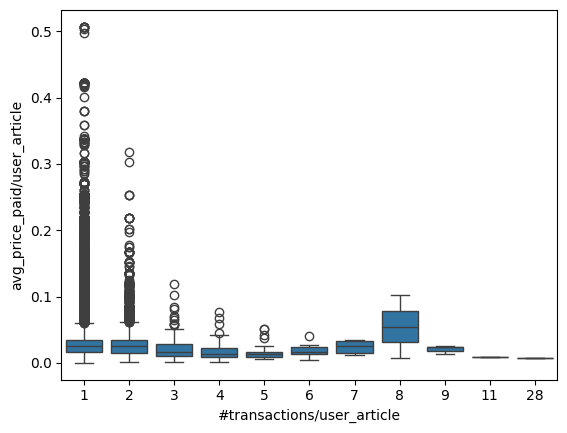

In [201]:
#The distribution of number of transactions by article and user,
#also including the information about the average price paid is also interesting
cus_count_price = transactions.groupby(['customer_id','article_id']).agg({'t_dat':'count', 'price':'mean'}).reset_index().rename(columns={'price':'avg_price_paid/user_article','t_dat':'#transactions/user_article'})
sns.boxplot(cus_count_price, x = '#transactions/user_article', y='avg_price_paid/user_article')
matplotlib.pyplot.show()

In [204]:
#Saving subsampled transactions
transactions.to_csv('../../data/processed/transactions_005_0.csv', index=False)